### Imports

In [249]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

### Reading data

In [250]:
df= pd.read_csv("train.csv",index_col=0 )

### Data exploration and visualisation

In [251]:
# # for comparing different features to each other from the dataset, with hue as Edible
# #I just made comments out of this so you dont have to read all the output

# sns.pairplot(df, hue='Edible')
# plt.show()

In [252]:
#For looking at the distribution of the data of each feature in the dataset 
#I just made comments out of this so you dont have to read all the output

# for column in df.columns:
#     plt.figure(figsize=(10, 4))
#     sns.histplot(df[column], kde=True)  # kde (Kernel Density Estimate) adds a density curve
#     plt.title(f'Distribution of {column}')
#     plt.xlabel(column)
#     plt.ylabel('Frequency')
#     plt.show()

In [253]:
#Looking for correlation between features in the dataset 
#I just made comments out of this so you dont have to read all the output

# corr_matrix = df.corr()
# # Apply formatting to round the values to two decimal places.
# # The .applymap() method applies a lambda function to each element of the correlation matrix.
# # The lambda function converts each value 'x' in the matrix to a formatted string with two decimal places.
# corr_matrix_rounded = corr_matrix.applymap(lambda x: f'{x:.2f}')

# # Plotting the heatmap, first setting the size of the heatmap
# plt.figure(figsize=(10, 8))
# # 'annot=corr_matrix_rounded' is used to display the rounded correlation values as annotations on the heatmap.
# # 'fmt=' specifies that the annotation texts (rounded values) are strings, not floats or integers.
# # 'cmap='coolwarm' sets the colormap to 'coolwarm' 
# sns.heatmap(corr_matrix, annot=corr_matrix_rounded, fmt='', cmap='coolwarm')
# plt.title('Correlation Heatmap')
# plt.show()

In [254]:
# Looking at df to see how many rows and columns there is 
#I just made comments out of this so you dont have to read all the output
#df

In [255]:
df.describe()

,Acoustic Firmness Index,Atmospheric Pressure at Harvest (Pa),Bitterness Scale,Circumference (mm),Color Intensity (a.u.),Find Distance from Main Vulcano (km),Length (mm),Luminescence Intensity (a.u.),Magnetic orientation (degree),Odor index (a.u.),Seed Count,Skin Thickness (mm),Soil pH where Grown,Sugar Content (mg),Weight (mg),pH,Edible
count,1245.000000,1248.000000,1244.000000,1246.000000,1248.000000,1246.000000,1244.000000,1247.000000,1245.000000,1246.000000,1247.000000,1247.000000,1245.000000,1245.000000,1244.000000,1244.000000,1248.000000
mean,21.570077,101327.543269,1.808682,211.046062,63.300962,44.188204,33.589646,0.002850,178.933737,16.602442,48.926812,3.839615,7.278739,11835.978313,78446.779224,4.614780,0.494391
std,8.131888,4772.582203,1.960279,24.652278,7.118135,28.331532,3.874355,0.003607,102.113321,14.882420,35.871733,1.483029,0.529815,2417.733775,26637.766132,0.993407,0.500169
min,0.600000,83825.000000,0.000000,145.867667,46.060000,2.550790,23.451799,0.000004,0.085357,1.722825,0.000000,1.000000,5.710000,4566.000000,32352.182600,-5.120000,0.000000
25%,17.300000,98095.750000,0.000000,192.982222,58.577500,21.203453,30.777936,0.000627,90.582930,7.615908,15.852008,3.000000,6.910000,10353.000000,57087.682600,4.174979,0.000000
50%,21.300000,101357.000000,1.000000,212.429730,62.390000,38.880858,33.784401,0.001757,180.043851,12.258785,47.932723,4.000000,7.280000,11807.000000,77440.682600,4.910000,0.000000
75%,25.300000,104470.750000,3.000000,226.313333,67.202500,60.680816,36.049083,0.003767,266.481765,20.302048,80.413165,5.000000,7.660000,13534.000000,92664.102600,5.080000,1.000000
max,156.520701,115636.000000,7.000000,274.719407,97.810000,109.952511,43.691515,0.044624,359.443812,152.041780,112.968004,8.500000,8.980000,18246.000000,164679.342600,6.081918,1.000000


#### Comments on the data after visualization
Some of the pH values didn't look right. There was some negative ph values, which doesn't make sense.
It looked like there was some outliers on some of the features, which is also getting removed before training.

### Data cleaning

In [256]:
#replacing nan-values with median
# I do this instead of removing the rows, because it gave me better accuracy when training models
df_cleaned= df.fillna(df.median())

# Dropping rows with negative pH values
df_cleaned = df_cleaned.drop(df_cleaned[df_cleaned['pH'] < 0].index)

#Dropping rows with feature values that clearly looks like outliers.
# I did this manually by just looking at the plots, but i could've also removed data with z-score
df_cleaned= df_cleaned.drop(df_cleaned[df_cleaned["Acoustic Firmness Index"] > 50].index)
df_cleaned= df_cleaned.drop(df_cleaned[df_cleaned["Odor index (a.u.)"] > 85].index)



#I've could've also dropped these rows under, but the accuracy got worse when doing this
#df_cleaned= df_cleaned.drop(df_cleaned[df_cleaned["Luminescence Intensity (a.u.)"] > 0.017].index)

# For checking how many rows i've removed
#I just made comments out of this so you dont have to read all the output
#df_cleaned


### Data preprocessing and visualisation

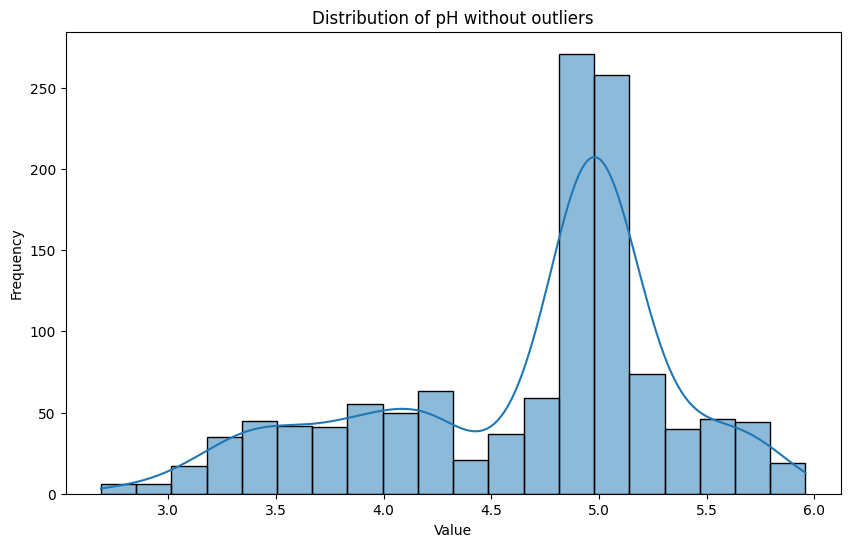

In [257]:
# Plotting the distribution of pH values after data-cleaning
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned["pH"], kde=True)
plt.title('Distribution of pH without outliers')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

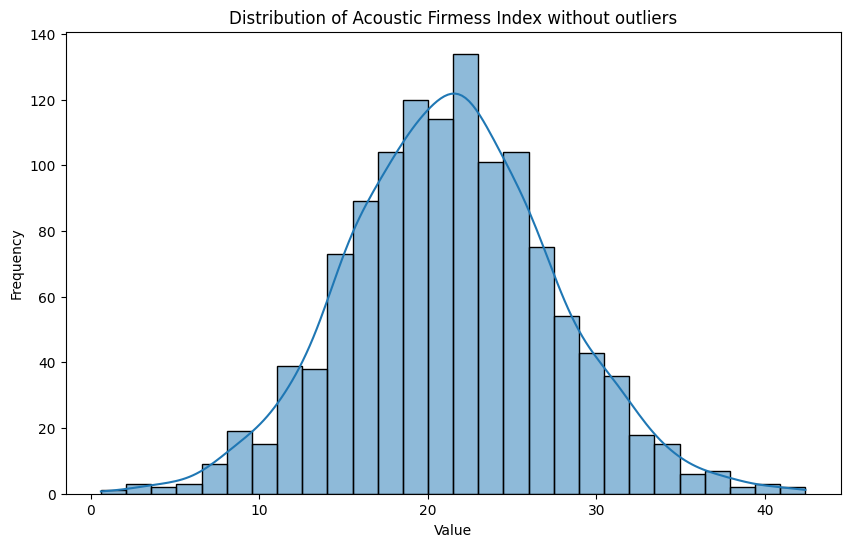

In [258]:
# Plotting the distribution of Acoustic Firmess Index after data-cleaning
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned["Acoustic Firmness Index"], kde=True)
plt.title('Distribution of Acoustic Firmess Index without outliers')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

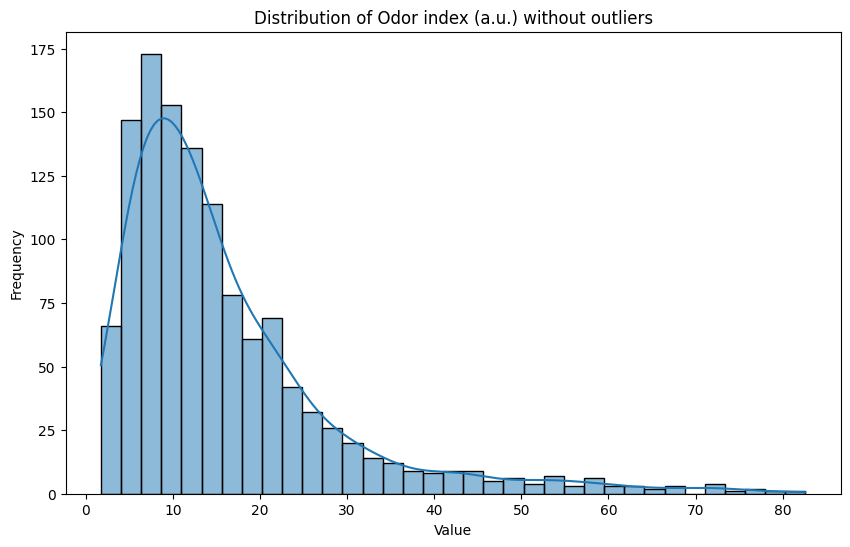

In [259]:
# Plotting the distribution of Odor index (a.u.) after data-cleaning
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned["Odor index (a.u.)"], kde=True)
plt.title('Distribution of Odor index (a.u.) without outliers')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [260]:
# Removing the target column from the DataFrame and uses the rest as features
X = df_cleaned.drop('Edible', axis=1)  
# Selcts Edible as target columns 
y = df_cleaned['Edible']


#Splitting up into training and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Initialise standard scaler and compute mean and stddev from training data


### Modelling

In [261]:
# No need to standardize the data for Random Forest 

# Trying ot RandomForestClassifier
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

# Making predictions with training data
y_pred_train = rfc.predict(X_train)
#computing accuracy from training data
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f'Accuracy on training data: {accuracy_train:.2f}')

# Making predictions with test data
y_pred = rfc.predict(X_test)
#computing accuracy from test data
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on test data: {accuracy:.2f}')


Accuracy on training data: 1.00
Accuracy on test data: 0.92


Here i tried different classifiers, but i took it out so you have less code to look at!

### Final evaluation

Got best accuracy from randomforest, so i use this classifier

In [262]:
# Getting feature importance
feature_importances = rfc.feature_importances_

# Creating a DataFrame for feature importances
features_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sorting the features by importance
features_df = features_df.sort_values(by='Importance', ascending=False)
print("Feature importances:\n", features_df)

Feature importances:
                                  Feature  Importance
15                                    pH    0.234173
13                    Sugar Content (mg)    0.126118
2                       Bitterness Scale    0.117119
14                           Weight (mg)    0.080775
6                            Length (mm)    0.069948
7          Luminescence Intensity (a.u.)    0.068749
9                      Odor index (a.u.)    0.056343
3                     Circumference (mm)    0.047983
0                Acoustic Firmness Index    0.038648
8          Magnetic orientation (degree)    0.026284
1   Atmospheric Pressure at Harvest (Pa)    0.025742
4                 Color Intensity (a.u.)    0.025164
5   Find Distance from Main Vulcano (km)    0.024629
12                   Soil pH where Grown    0.023813
10                            Seed Count    0.018422
11                   Skin Thickness (mm)    0.016090


In the next box i try all different combinations of features. I use the feautre combination that has the highest accuracy 

In [296]:
# Selecting subsets of features starting from the most important
best_average_accuracy = 0
best_features = []

from sklearn.svm import SVC

for i in range(1, len(features_df.Feature) + 1):
    #Selecting the combination to use for the model
    selected_features = features_df.Feature.head(i)
    X_selected = X[selected_features]

    #storing accuracy 
    accuracies = []
    from sklearn.neighbors import KNeighborsClassifier
    # Iterate over a range of random states for train-test split
    for r in range(1,100, 10):
        # Splitting data with varying random states, to avoid overfitting
        #splitting with only the selected features
        X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=r)
        
        sc = StandardScaler()
        sc.fit(X_train)

        # Transform (standardise) both X_train and X_test with mean and stddev from
        # training data, to avoid leakage 
        X_train_sc = sc.transform(X_train)
        X_test_sc = sc.transform(X_test)
        # Initialize the model
        model = KNeighborsClassifier()
        model.fit(X_train_sc, y_train)
        
        # Evaluate the model on the test set
        predictions = model.predict(X_test_sc)
        accuracy = accuracy_score(y_test, predictions)
        accuracies.append(accuracy)
    
    # Calculate the average accuracy across all splits for this set of features
    average_accuracy = np.mean(accuracies)
    
    # Update the best feature-lsit if the current average accuracy is better
    if average_accuracy > best_average_accuracy:
        best_average_accuracy = average_accuracy
        best_features = selected_features.tolist()

print(f"Best Average Accuracy: {best_average_accuracy:.4f}")
print(f"Best Features: {best_features}")

#0.9106

Best Average Accuracy: 0.8890
Best Features: ['pH', 'Sugar Content (mg)', 'Bitterness Scale', 'Weight (mg)', 'Length (mm)', 'Luminescence Intensity (a.u.)', 'Odor index (a.u.)', 'Circumference (mm)']


In the next box, i try to find the best paramters for the model. I started with looping over n_estimators, and selected the value with the best accuracy. Then i adjusted the code with best_n_estimators, and looped over different values of max_depth. I select the max_depth-value that gave me the highest accuraccy with the best_n_estimators. This goes on in the same pattern for the next parameter.

I've tried using different criterions and random_states for the model, and earlier i've found that criterion= "gini" and randomstate= 42 has worked well for me..

I could have tried to find more paramters to use in the model, but the ones i've used here has worked well enough.

In [306]:
# Here i set the best values for parameters i've already found.
# Stores the best configuration in the loop
best_accuracy = 0
best_config_knn = {}
n_neighbors= 10

#looping over different values for the next parameter to find, which here is min_samples split
parameters_to_try=  [1]
                     
for parameter in parameters_to_try:
    #Storing accuracies for different random states
    accuracies = []

    # Iterate over a range of random states for train-test split
    for r in range(1, 100, 10):

        # Splitting data with varying random states, to avoid overfitting
        #also only using the selected features
        X_train, X_test, y_train, y_test = train_test_split(X[best_features], y, test_size=0.2, random_state=r)


        sc = StandardScaler()
        sc.fit(X_train)

        # Transform (standardise) both X_train and X_test with mean and stddev from
        # training data, to avoid leakage 
        X_train_sc = sc.transform(X_train)
        X_test_sc = sc.transform(X_test)
        # Initialize the model
        model = KNeighborsClassifier(n_neighbors= 10, p=1, weights= "uniform")
        model.fit(X_train_sc, y_train)
     
        # Evaluate the model on the validation set
        predictions = model.predict(X_test_sc)
        accuracy = accuracy_score(y_test, predictions)
        accuracies.append(accuracy)

    # Calculate the average accuracy across all splits
    average_accuracy = np.mean(accuracies)

    # Update the best configuration for new parameter if necessary
    if average_accuracy > best_accuracy:
        best_accuracy = average_accuracy
        best_parameter= parameter
        best_config_knn = {
          "n_neighbors": best_parameter
        }

# Print the best configuration and its accuracy
print("Best Configuration:")
print(best_config_knn)
print(f"Best Validation Accuracy: {best_accuracy:.4f}")

Best Configuration:
{'n_neighbors': 1}
Best Validation Accuracy: 0.9012


In [265]:
# Here i set the best values for parameters i've already found.
best_n_estimators = 181
best_max_depth= 11

# Stores the best configuration in the loop
best_accuracy = 0
best_config = {}

#looping over different values for the next parameter to find, which here is min_samples split
parameters_to_try=  [1]

for parameter in parameters_to_try:
    #Storing accuracies for different random states
    accuracies = []

    # Iterate over a range of random states for train-test split
    for r in range(1, 100, 10):

        # Splitting data with varying random states, to avoid overfitting
        #also only using the selected features
        X_train, X_test, y_train, y_test = train_test_split(X[best_features], y, test_size=0.2, random_state=r)

        # Initialize and train the RandomForest model
        #Using the best paramters that i've found earlier with the same code
        #using different values for min_samples_split to find the new best one in this case
        model = RandomForestClassifier(random_state=42, criterion="gini", n_estimators= best_n_estimators, max_depth= best_max_depth)
        model.fit(X_train, y_train)

        # Evaluate the model on the validation set
        predictions = model.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        accuracies.append(accuracy)

    # Calculate the average accuracy across all splits
    average_accuracy = np.mean(accuracies)

    # Update the best configuration for new parameter if necessary
    if average_accuracy > best_accuracy:
        best_accuracy = average_accuracy
        best_parameter= parameter
        best_config = {
            'n_estimators': best_n_estimators,
            'max_depth': best_max_depth,
            'random_state': 42,
            'criterion': "gini",
            #'min_samples_split': best_mms,
            #'max_features': best_parameter  #store best new parameter
            #if im trying to find more paramters:
        }

# Print the best configuration and its accuracy
print("Best Configuration:")
print(best_config)
print(f"Best Validation Accuracy: {best_accuracy:.4f}")

# 91.14

Best Configuration:
{'n_estimators': 181, 'max_depth': 11, 'random_state': 42, 'criterion': 'gini'}
Best Validation Accuracy: 0.9073


In [266]:
# Just checking what parameters i ended up with
best_config

{'n_estimators': 181, 'max_depth': 11, 'random_state': 42, 'criterion': 'gini'}

In [271]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
# Assume X_train, X_test, y_train, y_test are already defined
# as well as any preprocessing needed

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Assuming that best_features and best_config are defined, as well as X_train, X_test, y_train, y_test

# Define base models with their pipelines if necessary
base_models = [
    ('rf', RandomForestClassifier(**best_config)),  # No need for scaling
    ('svc_pipeline', Pipeline([
       ('scaler', StandardScaler()),  # Scale features for SVC
       ('svc', SVC(**best_config_svc))  # Probability=True for stacking
   ]))
]

# Define a meta-model with its pipeline
meta_model_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scale features for Logistic Regression
    ('logistic', LogisticRegression(max_iter=100, C=0.001))
])

# Define the stacking ensemble
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model_pipeline, cv=5)

# Fit the model on the training data using only the best features
stacking_model.fit(X_train[best_features], y_train)

# Evaluate the model using only the best features
y_pred = stacking_model.predict(X_test[best_features])
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Stacking Classifier: {accuracy:.4f}')



Accuracy of Stacking Classifier: 0.9146


In [293]:
# Create a new RandomForestClassifier with the best configuration
#final_model= RandomForestClassifier(**best_config)
#final_model= StackingClassifier(estimators=base_models, final_estimator=meta_model_pipeline, cv=5)
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import pandas as pd

# Assuming best_config_svc is defined correctly
final_model = SVC(**best_config_svc)

# Initialize the StandardScaler
sc1 = StandardScaler()
# Assuming X and selected_features are defined correctly
X_selected = X[selected_features]
# Fit the scaler on the selected features of the training data
sc1.fit(X_selected)

# Transform the training data
X_sc = sc1.transform(X_selected)

# Train the model with the standardized training data
final_model.fit(X_sc, y)

# Load the test set
x_val = pd.read_csv("test.csv", index_col=0)
# Select only the selected (best) features
x_val_selected = x_val[selected_features]
# Standardize the test data using the same scaler
X_val_sc = sc1.transform(x_val_selected)

# Predict using the standardized test data
predictions = final_model.predict(X_val_sc).astype(int)


In [294]:
# Create a DataFrame with predictions
predictions_df = pd.DataFrame(predictions, columns=['Edible'])
predictions_df.index.name = 'index'

# Save to a CSV file
predictions_df.to_csv('predictions.csv')